In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import h5py
from scipy import interpolate
from ccfj import GetStationPairs
import pandas as pd
import yaml
import geopandas as gp

In [2]:
import sys
sys.path.append(r'../')
from toollib_standard import maplib
from toollib_standard import mathlib
from toollib_standard import filelib
from toollib_standard import stacklib
from toollib_standard import plotlib

In [3]:
with open('a-project.yml', 'r', encoding='utf-8') as f:
    proj = yaml.load(f.read(), Loader=yaml.FullLoader)
name_project = proj['name']
#name_project = 'project/output_FJSJ_16-01/'               # Harmon server
name_project

'project/output_FJSJ_17-06/'

In [4]:
with open('0_config.yml', 'r', encoding='utf-8') as f:
    dir_config = yaml.load(f.read(), Loader=yaml.FullLoader)
dir_project_workspace = dir_config['dir_project_workspace']
dir_CC_workspace = dir_config['dir_CC_workspace']
print('dir_CC_workspace: ', dir_CC_workspace)
print('dir_project_workspace: ', dir_project_workspace)
dir_project = dir_project_workspace + name_project
print('dir_project: ', dir_project)

dir_CC_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project_workspace:  /shdisk/rem2/Harmon/F-J/San/
dir_project:  /shdisk/rem2/Harmon/F-J/San/project/output_FJSJ_17-06/


In [5]:
filename = dir_project+'Basic_info.yml'
with open(filename, 'r', encoding='utf-8') as f:
    info_basic = yaml.load(f.read(), Loader=yaml.FullLoader)
filename_bi = dir_project+'Basic_info.npy'
info_basic_bi = np.load(filename_bi, allow_pickle='TRUE').item()      # setting dictionary

In [6]:
dir_stack = dir_project + info_basic['dir_stack']
dir_ds = dir_project + info_basic['dir_ds']
#d_len = info_basic['d_len']
dir_image = dir_project + info_basic['dir_image']

In [7]:
key_subworks = info_basic['key_subworks'][::50]
#key_subworks = ['04-02']
key_subworks

['03-02',
 '53-02',
 '47-03',
 '41-04',
 '35-05',
 '29-06',
 '23-07',
 '17-08',
 '11-09',
 '05-10',
 '55-10',
 '49-11',
 '43-12',
 '37-13',
 '31-14',
 '25-15',
 '19-16',
 '13-17',
 '07-18',
 '57-18',
 '51-19']

### read all stations coordinates

In [8]:
d_len = info_basic['d_len']

In [9]:
stalistname_all = info_basic['stalistname_all']
stainfo = pd.read_excel(stalistname_all)
nsta_all = len(stainfo.iloc[:,0])
StationPairs_all = GetStationPairs(nsta_all)
nPairs_all = int(len(StationPairs_all)/2)
stalist_all = stainfo['Station'].tolist()
lat_all = stainfo['latitude'].tolist() 
lon_all = stainfo['longitude'].tolist()

In [10]:
faults = np.load('clark_faults.npy', allow_pickle='TRUE').item()

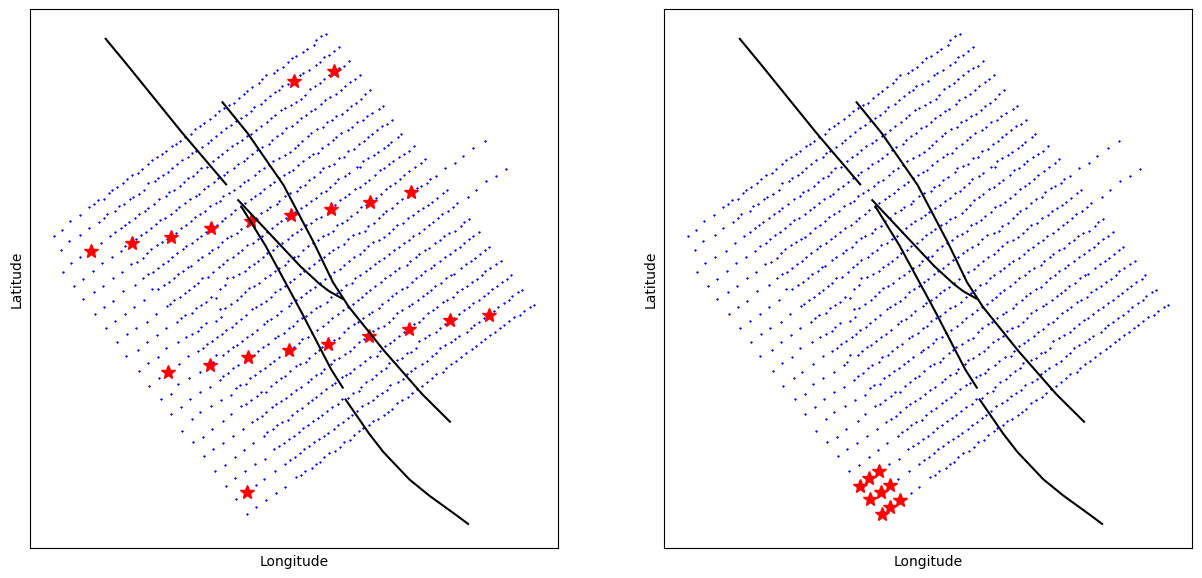

In [11]:
dir_image = dir_project + info_basic['dir_image']
lat = []
lon = []
for key_subwork in key_subworks:
    key = 'R'+key_subwork[0:2]+key_subwork[3:]
    if key in stalist_all:
        indx = stalist_all.index(key)
        lat.append(lat_all[indx])
        lon.append(lon_all[indx])
    else:
        key1 = 'R' + str(int(key_subwork[0:2])-1).zfill(2)+key_subwork[3:5]
        key2 = 'R' + str(int(key_subwork[0:2])+1).zfill(2)+key_subwork[3:5]
        indx1 = stalist_all.index(key1)
        indx2 = stalist_all.index(key2)
        lat_this = (lat_all[indx1]+lat_all[indx2])/2
        lon_this = (lon_all[indx1]+lon_all[indx2])/2
        lat.append(lat_this)
        lon.append(lon_this)
fig,ax2 = plt.subplots(1,2,figsize=(15,7))
ax2[0]=plotlib.plot_area(ax2[0],lon_all,lat_all,lon,lat,markersize=1,markersize2=10)
for i in range(len(faults)):
    ax2[0].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
    
lat = []
lon = []
key_subwork = key_subworks[0]
key = 'R'+key_subwork[0:2]+key_subwork[3:]
stalistname = dir_project+info_basic['stalistname']
stainfo = pd.read_excel(stalistname,key_subwork)
nsta = len(stainfo.iloc[:,0])
StationPairs = GetStationPairs(nsta)
nPairs = int(len(StationPairs)/2)
stalist = stainfo['Station'].tolist()
lat = stainfo['latitude'].tolist() 
lon = stainfo['longitude'].tolist()
ax2[1]=plotlib.plot_area(ax2[1],lon_all,lat_all,lon,lat,markersize=1,markersize2=10)
for i in range(len(faults)):
    ax2[1].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
    
plt.savefig(dir_image+'station_distribution.png',dpi=100)

In [12]:
stalistname = dir_project+info_basic['stalistname']
stainfo_all = pd.read_excel(stalistname,sheet_name=None)

In [13]:
#%%capture
c_map = 'jet'
v_min = 0.1
v_max = None
info_basic['v_min'] = v_min
info_basic['v_max'] = v_max
info_basic['c_map'] = c_map
#t0 = info_basic['t0']
#v_tag = info_basic['v_tag']
for key_subwork in key_subworks:
    print(key_subwork+' start. '+ str(key_subworks.index(key_subwork)+1)+'/'+str(len(key_subworks)))
    fig,ax = plt.subplots(3,3,figsize= (22,18))
    # settings for subwork
    
    
    #start = info_basic_bi['start'][key_subwork]
    #interval = info_basic_bi['interval'][key_subwork]
    #flag_time = info_basic_bi['flag_time'][key_subwork]
    start = 0
    interval = 10
    flag_time = 0.01

    xlim_f = [0,40]
    xlim_T = [-1,1]

    # plot area
    
    stainfo = stainfo_all[key_subwork]
    nsta = len(stainfo.iloc[:,0])
    StationPairs = GetStationPairs(nsta)
    nPairs = int(len(StationPairs)/2)
    stalist = stainfo['Station'].tolist()
    lat = stainfo['latitude'].tolist() 
    lon = stainfo['longitude'].tolist()
    ax[0][0]=plotlib.plot_area(ax[0][0],lon_all,lat_all,lon,lat)
    for i in range(len(faults)):
        ax[0][0].plot(faults['clark'+str(i+1)]['lon'], faults['clark'+str(i+1)]['lat'], 'k')
    

    # plot ncfs and ncfst
    # linear stack
    outname = key_subwork+'_gather_linear.h5'
    ncffile = h5py.File(dir_stack + outname,'r')
    ncfs_sum_linear = ncffile['ncfs'][:]
    r = ncffile['r'][:]
    ncffile.close()
    # timewindow-filtered stack
    outname = key_subwork+'_gather_timewindow.h5'
    ncffile = h5py.File(dir_stack + outname,'r')
    ncfs_sum_remove = ncffile['ncfs'][:]
    ncffile.close()

    f = info_basic_bi['f']
    t = info_basic_bi['t']
    ncfst_linear = mathlib.freq_time(ncfs_sum_linear)
    ncfst_remove = mathlib.freq_time(ncfs_sum_remove)
    
    title1 = "Linear Stack subarea frequency for "+key_subwork
    #xlim_f = [0,15]
    ax[0][1] = plotlib.plot_ncfs(ax[0][1],f,ncfs_sum_linear,r,title1,xlim_f,0)
    ax[0][2] = plotlib.plot_ncfs(ax[0][2],f,ncfs_sum_remove,r,title1,xlim_f,0)
    
    # plot fj
    ds = h5py.File(dir_ds+'ds_'+key_subwork+'.h5', 'r')
    ds_linear = ds['ds_linear'][0]
    ds_remove = ds['ds_remove'][0]
    c = np.linspace(info_basic['c_min'],info_basic['c_max'],info_basic['c_num'])
    #c = np.linspace(100,2000,1000)
    title0 = "Linear Stack subarea time for "+key_subwork
    ax[1][0] = plotlib.plot_ncfst(ax[1][0],t,ncfst_linear[start::interval],r[start::interval],title0,flag_time,xlim_T,0)
    title0 = "Remove Stack subarea time for "+key_subwork
    ax[1][1] = plotlib.plot_ncfst(ax[1][1],t,ncfst_remove[start::interval],r[start::interval],title0,flag_time,xlim_T,0)
    for i in range(len(r)):
        ax[1][1].plot()


    
    title0 = "Linear stack dispersion curve "+str(d_len)+' days'
    ax[2][0] = plotlib.plot_fj(ax[2][0],ds_linear,title0,f,c,0,v_min=v_min,v_max=v_max,c_map=c_map)
    ax[2][0].set_xlim(xlim_f)

    title0 = "Remove stack dispersion curve "+str(d_len)+' days'
    ax[2][1] = plotlib.plot_fj(ax[2][1],ds_remove,title0,f,c,0,v_min=v_min,v_max=v_max,c_map=c_map)
    ax[2][1].set_xlim(xlim_f)


    plt.tight_layout()
    plt.savefig(dir_image+key_subwork+'_compare_remove.png',dpi=100)
    plt.close()

03-02 start. 1/21
53-02 start. 2/21
47-03 start. 3/21
41-04 start. 4/21
35-05 start. 5/21
29-06 start. 6/21
23-07 start. 7/21
17-08 start. 8/21
11-09 start. 9/21
05-10 start. 10/21
55-10 start. 11/21
49-11 start. 12/21
43-12 start. 13/21
37-13 start. 14/21
31-14 start. 15/21
25-15 start. 16/21
19-16 start. 17/21
13-17 start. 18/21
07-18 start. 19/21
57-18 start. 20/21
51-19 start. 21/21


In [14]:
with open(dir_project+'Basic_info.yml', 'w', encoding='utf-8') as f:
   yaml.dump(data=info_basic, stream=f, allow_unicode=True)